# Lead Scoring - Case Study


## Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 


Now, although X Education gets a lot of leads, its lead conversion rate is very poor.To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

The company requires us to build a model wherein we need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Business Goal:
Below are the goals for this case study:

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads
- There are some more problems presented by the company which our model should be able to adjust to if the company's requirement changes in the future


In [1]:
#Import all required packages used are numpy, pandas, matplotlib, seaborn, statsmodels, sklearn etc.,

# Let us import required libraries
import numpy as np
import pandas as pd

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For Scaling
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler

# For Modelling
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score

#  Steps to be followed
*  Step 1 - Reading and understanding the data 
*  Step 2 - Data cleaning : handling missing/Null values, correcting incorrect values
*  Step 3 - EDA - pairplots, heatmap, Univariate analysis of the data
*  Step 4 - Data Preparation - handling outliers, creating dummy variables, test train split, rescaling the data
*  Step 5 - Data Modelling -  building the model, evaluating the model on train data , calculating the metrics
*  Step 6 - Predicting and evaluating the model on test data
*  Step 7 - Conclusion and Recommendations

## Step 1: Reading and Understanding the Data


Let us first read the Leads dataset do data exploration

In [2]:
#Import required Leads dataset
leads = pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Let us check the number of rows and columns
leads.shape

(9240, 37)

In [4]:
# Let us check the different columns in the dataset
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [5]:
# Let us see complete information about the dataframe with column details and null values present
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

It appears that there are many categorical variables present in this dataset for which we will need to create dummy variables. 

Also, there are a lot of null values present as well, so we will need to treat them.


In [6]:
# Check the summary of the dataset
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


- The shape of the dataset is 9240x37
- The "count" row indicates that the columns TotalVisits, Page Views Per Visit, Asymmetrique Activity Score, Asymmetrique Profile Score have null values
- Apparently TotalVisits has outlier(s) becuase the max value is very large compared to other statistics. So is the case with Total Time Spent on Website, Page Views Per Visit
- There are 7 numerical columns and 30 categorical columns

## Step 2: Data Cleaning

### Check Duplicates

In [7]:
# Create a dummy dataframe (copy of original leads df) for duplicate check
leads1 = leads

# Checking for duplicates and dropping the entire duplicate row if any
leads1.drop_duplicates(subset=None, inplace=True)

In [8]:
leads1.shape

(9240, 37)

**The shape after running the drop duplicate command is same as the original dataframe**

Hence we conclude that there were **NO DUPLICATE** values in the dataset

In [9]:
# Checking the value_counts in every variables to understand the data better
# Let us create a copy of leads dataframe, without the first two unique value columns, 
# as this will have unique values, and donot make sense to do a value count on it.
leads_dummy=leads.iloc[:,2:]

for col in leads_dummy:
    print(leads_dummy[col].value_counts(), '\n')

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64 

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
blog                    1
Pay per Click Ads       1
testone                 1
youtubechannel          1
NC_EDM                  1
WeLearn                 1
welearnblog_Home        1
Name: Lead Source, dtype: int64 

No     8506
Yes     734
Name: Do Not Email, dtype: int64 

No     9238
Yes       2
Name: Do Not Call, dtype: int64 

0    5679
1    3561
Name: Converted, dtype: int64 

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5

Name: Asymmetrique Profile Score, dtype: int64 

No    9240
Name: I agree to pay the amount through cheque, dtype: int64 

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64 

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Form Submitted on Website          1
Email Received                     1
Resubscribed to emails             1
View in browser link Clicked       1
Approached upfront                 1
Name: Last Notable Activity, dtype: int64 



#### Observation:

From the above value_counts, we could see that the below variables has highly IMBALANCED data.

These columns have only one value that was majorly present for all the data points

So these will not significantly contribute to our model results. Hence we will tag them to be dropped. 

- Magazine 
- Newspaper Article 
- X Education Forums 
- Newspaper 
- Digital Advertisement 
- Through Recommendations 
- Receive More Updates About Our Courses 
- Update me on Supply Chain Content 
- Get updates on DM Content 
- I agree to pay the amount through cheque 
- What matters most to you in choosing a course 
- Search 
- Do Not Call 
- What is your current occupation

In [10]:
cols_to_drop = ['Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
                'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses',
                'Update me on Supply Chain Content', 'Get updates on DM Content',
                'I agree to pay the amount through cheque', 'Do Not Call','Search', 
                'What matters most to you in choosing a course','What is your current occupation']
cols_to_drop

['Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'Do Not Call',
 'Search',
 'What matters most to you in choosing a course',
 'What is your current occupation']

**Check the 'Prospect ID' & 'Lead Number' variables**

In [11]:
# Checking if this is a unique ID with no duplicates

leads.duplicated(subset = 'Prospect ID').sum()

0

In [12]:
# Checking if this is a unique ID with no duplicates

leads.duplicated(subset = 'Lead Number').sum()

0

#### Observation:
'Prospect ID','Lead Number' seems to be purely unique ID's, and will not make any significant contributions to our model results. 

These are just unique values to identify a record. Hence we will add them to the 'to_drop_list'.

In [13]:
#Adding the variables to cols_to_drop
cols_to_drop.append('Prospect ID')
cols_to_drop.append('Lead Number')
#cols_to_drop

### Handling Select values
- In our initial analysis (value_counts) We saw a large number of 'Select' values present in various columns in the dataset. 

These values correspond to the user having not made any selection.
So we will consider them as NULL values. We will convert all 'Select' to 'NaN'

In [14]:
#Checking unique value counts of City column

leads.City.value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [15]:
#Checking unique value counts of Specialization columns
leads.Specialization.value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [16]:
#Checking unique value counts of 'How did you hear about X Education' column

leads['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [17]:
#Checking unique value counts of 'Lead Profile' column

leads['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

#### Observation:

We notice that 4 columns have 'Select' values. Below are those columns.
 - City
 - Specialization
 - How did you hear about X Education
 - Lead Profile 

Let us convert all 'Select' to 'NaN'

In [18]:
# Replace the 'Select with NaN'
leads = leads.replace('Select', np.nan)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [19]:
# Let us create a utility function to generate a list of null values in different dataframes
# We will utilize this function where ever required in this notebook
def NullPercent(dataframe):
    totalNullValues = dataframe.isnull().sum().sort_values(ascending=False)
    percentageOfNullValues = round((dataframe.isnull().sum()*100/len(dataframe)).sort_values(ascending=False),2)
    Columns = pd.concat([totalNullValues, percentageOfNullValues], axis=1, keys=['Total Null Values', 'Percentage of Null Values'])
    return Columns

In [20]:
# Let us check the number of null values and % wise in all columns
NullPercent(leads)

,Total Null Values,Percentage of Null Values
How did you hear about X Education,7250,78.46
Lead Profile,6855,74.19
Lead Quality,4767,51.59
Asymmetrique Profile Score,4218,45.65
Asymmetrique Activity Score,4218,45.65
Asymmetrique Profile Index,4218,45.65
Asymmetrique Activity Index,4218,45.65
City,3669,39.71
Specialization,3380,36.58
Tags,3353,36.29


#### Observation:

From the above we see that there are some columns with over **45%** of null values.

First we will create a new dataset and then **drop those columns** from the data set. We will then assess the dataset to check the kind of values other columns with high number of null values hold and make a decision on whether or not we should drop them or impute those values. 

In [21]:
#Adding the variables to cols_to_drop
cols_to_drop.extend(['How did you hear about X Education','Lead Profile','Lead Quality', 
                    'Asymmetrique Profile Score', 'Asymmetrique Activity Score', 'Asymmetrique Profile Index',
                    'Asymmetrique Activity Index'])
#cols_to_drop

In [22]:
# Let us drop all the columns we have in the to be list of columns
leads.drop(columns = cols_to_drop, axis = 1, inplace = True)

In [23]:
# Let us check our df once again
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Interested in other courses,NaN,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,NaN,Ringing,NaN,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Will revert after reading the email,Mumbai,No,Modified


In [24]:
# Let us check the number of null values and % wise in all columns
NullPercent(leads)

,Total Null Values,Percentage of Null Values
City,3669,39.71
Specialization,3380,36.58
Tags,3353,36.29
Country,2461,26.63
Page Views Per Visit,137,1.48
TotalVisits,137,1.48
Last Activity,103,1.11
Lead Source,36,0.39
Last Notable Activity,0,0.00
A free copy of Mastering The Interview,0,0.00


#### Observation:

After dropping all columns with more than 45% missing values, we have above set remaining.

Let us review rest of columns one by one to arrive at final set of columns

Let us first check at City and Country columns


In [25]:
#Checking unique value counts of Country column
leads.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Nigeria                    4
South Africa               4
Kuwait                     4
Germany                    4
Canada                     4
Sweden                     3
Belgium                    2
Netherlands                2
Bangladesh                 2
Ghana                      2
Asia/Pacific Region        2
Philippines                2
China                      2
Italy                      2
Uganda                     2
Malaysia                   1
Sri Lanka                  1
Denmark                    1
Vietnam                    1
Tanzania                   1
Indonesia                  1
Kenya         

#### Observation:
Majority of the data seems to be from India only, rest of other countries do not even make 5% of data

Also, there are lots of missing values in this column. So,let us drop this column

In [26]:
#Checking unique value counts of City column
leads.City.value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

#### Observation:
Majority of the data seems to be from **Mumbai** only, rest of other cities do not even make 10% of data

Also, there are lots of missing values in this column. So,let us drop this column

In [27]:
#Checking unique value counts of Tags column
leads.Tags.value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

#### Observation:
Clearly lot of data is distributed with multiple channels and doesnt seem to help us in our analysis

Also, there are lots of missing values in this column. So,let us drop this column

In [28]:
# Drop City, Country and Tags columns based on above analysis
leads.drop(['City'], axis = 1, inplace = True)
leads.drop(['Country'], axis = 1, inplace = True)
leads.drop(['Tags'], axis = 1, inplace = True)

In [29]:
# Let us now again check the number of null values and % wise in all columns
NullPercent(leads)

,Total Null Values,Percentage of Null Values
Specialization,3380,36.58
Page Views Per Visit,137,1.48
TotalVisits,137,1.48
Last Activity,103,1.11
Lead Source,36,0.39
Last Notable Activity,0,0.00
A free copy of Mastering The Interview,0,0.00
Total Time Spent on Website,0,0.00
Converted,0,0.00
Do Not Email,0,0.00


Now, other than Specialization column, we see that there are 4 columns with few 100 lines missing

We will first look at remaining 4 columns missing values and how to handle them

In [30]:
# Drop the null value rows in the column 'TotalVisits'

leads = leads[~pd.isnull(leads['TotalVisits'])]

In [31]:
# Let us now again check the number of null values and % wise in all columns
NullPercent(leads)

,Total Null Values,Percentage of Null Values
Specialization,3304,36.30
Lead Source,29,0.32
Last Notable Activity,0,0.00
A free copy of Mastering The Interview,0,0.00
Last Activity,0,0.00
Page Views Per Visit,0,0.00
Total Time Spent on Website,0,0.00
TotalVisits,0,0.00
Converted,0,0.00
Do Not Email,0,0.00


In [32]:
# Drop the null value rows in the column 'Lead Source'

leads = leads[~pd.isnull(leads['Lead Source'])]

In [33]:
# Checking unique value counts 
leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
blog                    1
Pay per Click Ads       1
testone                 1
youtubechannel          1
NC_EDM                  1
WeLearn                 1
welearnblog_Home        1
Name: Lead Source, dtype: int64

In [34]:
# Merging typo items of google and Google to same column
leads['Lead Source'] = leads['Lead Source'].replace(['google'], 'Google')

In [35]:
# Checking unique value counts 
leads['Lead Source'].value_counts()

Google               2873
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
welearnblog_Home        1
blog                    1
Pay per Click Ads       1
testone                 1
youtubechannel          1
NC_EDM                  1
WeLearn                 1
Name: Lead Source, dtype: int64

In [36]:
# Merging low frequency items to Others
leads['Lead Source'] = leads['Lead Source'].replace(['Facebook','bing','Click2call','Press_Release','Live Chat',
                                                    'Social Media','NC_EDM','Pay per Click Ads','testone','welearnblog_Home',
                                                     'youtubechannel','WeLearn','blog'], 'Others')

In [37]:
# Checking unique value counts 
leads['Lead Source'].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Others                54
Name: Lead Source, dtype: int64

In [38]:
# Let us look at rest of dataset now
leads['Specialization'].value_counts()

Finance Management                   959
Human Resource Management            837
Marketing Management                 823
Operations Management                499
Business Administration              399
IT Projects Management               366
Supply Chain Management              346
Banking, Investment And Insurance    335
Media and Advertising                202
Travel and Tourism                   202
International Business               176
Healthcare Management                156
E-COMMERCE                           111
Hospitality Management               111
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

**Merging less frequent values of 'Specialization' to 'Others' category**

Looking at the count of various values in 'Specialization' We see there are couple of low frequent values.Lets merge them into a new category 'Others'

'Specialization' has 3380 NULL values. We will impute the NULL values as 'Others' as not selecting a Specialization could mean that he or she has not worked in any industry earlier. So we will categorise them into Others.

In [39]:
# Imputing Null with Others, as it is generally Unknown sources
leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Others')

# Merging low frequency items to Others
leads['Specialization'] = leads['Specialization'].replace(['Rural and Agribusiness','E-Business','Services Excellence'], 'Others')

In [40]:
# Checking unique value counts 

leads['Specialization'].value_counts()

Others                               3452
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Media and Advertising                 202
Travel and Tourism                    202
International Business                176
Healthcare Management                 156
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Name: Specialization, dtype: int64

In [41]:
# Let us now again check the number of null values and % wise in all columns
NullPercent(leads)

,Total Null Values,Percentage of Null Values
Last Notable Activity,0,0.0
A free copy of Mastering The Interview,0,0.0
Specialization,0,0.0
Last Activity,0,0.0
Page Views Per Visit,0,0.0
Total Time Spent on Website,0,0.0
TotalVisits,0,0.0
Converted,0,0.0
Do Not Email,0,0.0
Lead Source,0,0.0


Now, we see that all missing and null value records are completely handled

In [42]:
# Checking unique value counts 

leads['Last Notable Activity'].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Form Submitted on Website          1
Email Received                     1
Resubscribed to emails             1
View in browser link Clicked       1
Approached upfront                 1
Name: Last Notable Activity, dtype: int64

**Merging less frequent values of 'Last Notable Activity' to 'Others' category**

Looking at the proportions of various values in 'Last Notable Activity' we could see there are couple of low frequent values in there. We will merge them into a new category 'Others'


In [43]:
# Merging low frequency items to Others
leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Email Bounced', 'Unsubscribed', 'Unreachable',
                                                                       'Had a Phone Conversation', 'Email Marked Spam', 'Form Submitted on Website',
                                                                       'Resubscribed to emails', 'View in browser link Clicked', 'Approached upfront',
                                                                       'Email Received'], 'Others')

In [44]:
# Checking unique value counts 
leads['Last Notable Activity'].value_counts()

Modified                   3267
Email Opened               2823
SMS Sent                   2152
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Others                      158
Name: Last Notable Activity, dtype: int64

### Data Imbalance - Check Percentage

Let us now check the data imbalance in our given data set

In [45]:
# Calculating % of of Non Converted and Converted Leads in the Dataset

round(100*leads['Converted'].value_counts(normalize=True),3).sort_values(ascending = False)

0    62.145
1    37.855
Name: Converted, dtype: float64

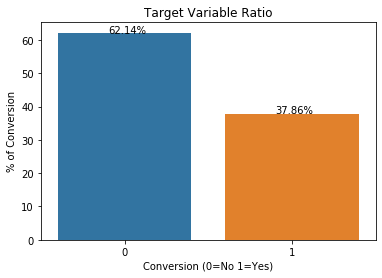

In [46]:
# Plot representing the Imbalance Percentage in lead DataFrame
ax = sns.barplot(x="Converted", y="Converted", data=leads, estimator=lambda x: len(x) / len(leads) * 100)
ax.set(ylabel="Percent")
for p in ax.patches:
        ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.3, p.get_height()))
plt.title('Target Variable Ratio')
plt.xlabel('Conversion (0=No 1=Yes)')
plt.xticks(rotation=0)
plt.ylabel('% of Conversion')
plt.show()

#### % Data Retained

Let us now look at how much data has retained after all the operations

In [47]:
round((100*leads.shape[0]/9240),2)

98.2

## Step 3: Exploratory Data Analysis

### Univariate Analysis

In [48]:
# fuction to plot bar plot
def univariatePlot(data,col,width=20,height=10,rotation=90):
                
        fig, ax = plt.subplots(figsize=(width,height))
        sns.countplot(data = data, x= col,order=data[col].value_counts().index)
        plt.xticks(rotation=rotation,fontsize=15)
        plt.yticks(fontsize=15)
        plt.xlabel(col,fontsize=18)
        plt.ylabel('count',fontsize=18)
        plt.tight_layout()
        for p in ax.patches:
                if float(p.get_height()) > 0:
                    height = p.get_height()
                    ax.annotate('{:1.2f}%'.format((height*100)/float(len(data))), (p.get_x()+0.05, height+100),weight='bold',fontsize=14)  
                else:
                    height = .00000001
                    ax.annotate('{:1.2f}%'.format((height*100)/float(len(data))), (p.get_x()+0.05, height+20),weight='bold',fontsize=14)  
        
plt.show()


In [49]:
# check leads dataframe
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   object 
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   int64  
 6   Page Views Per Visit                    9074 non-null   float64
 7   Last Activity                           9074 non-null   object 
 8   Specialization                          9074 non-null   object 
 9   A free copy of Mastering The Interview  9074 non-null   object 
 10  Last Notable Activity                   9074 non-null   obje

### Let's conduct univariate analysis for the below Categorial variables

Lead Origin <br>
Lead Source <br>
Specialization <br>
Last Notable Activity <br>

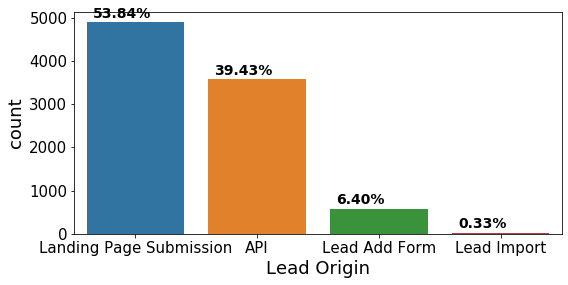

In [50]:
# Univariate analysis for Lead Origin 
univariatePlot(leads,col='Lead Origin',width=8,height=4,rotation=0)

#### Observation: 

We can see more leads for Landing Page Submissions and API



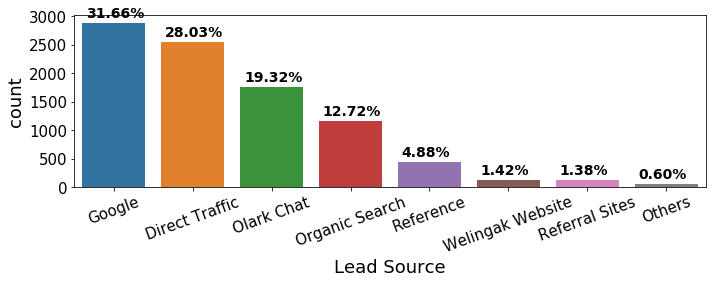

In [51]:
# Univariate analysis for Lead Source
univariatePlot(leads,col='Lead Source',width=10,height=4,rotation=20)

#### Observation: 

More leads are coming from Google, Direct Traffic and Olark chat


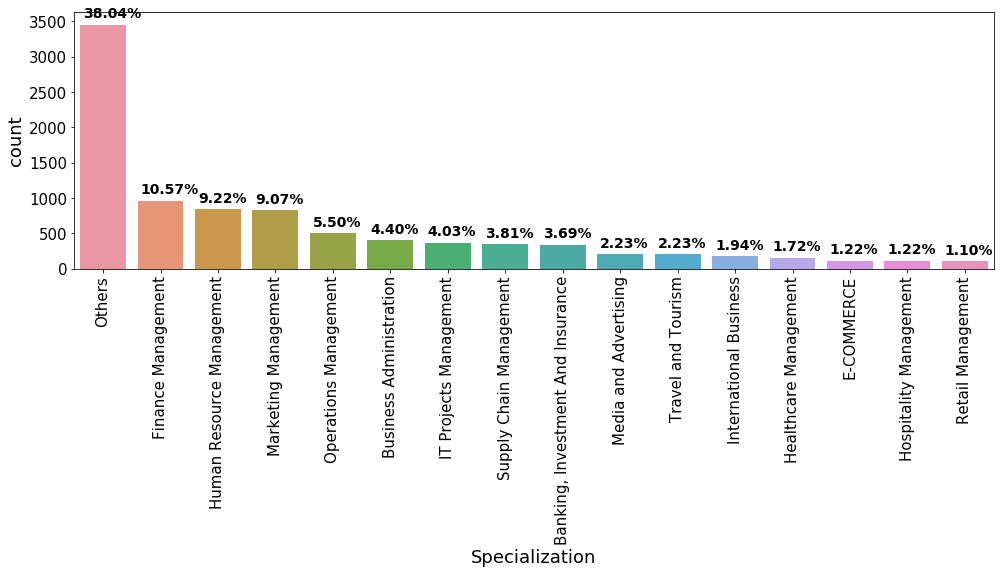

In [52]:
# Univariate analysis for Specialization
univariatePlot(leads,col='Specialization',width=14,height=8,rotation=90)

#### Observation: 

More leads are having Others specialization

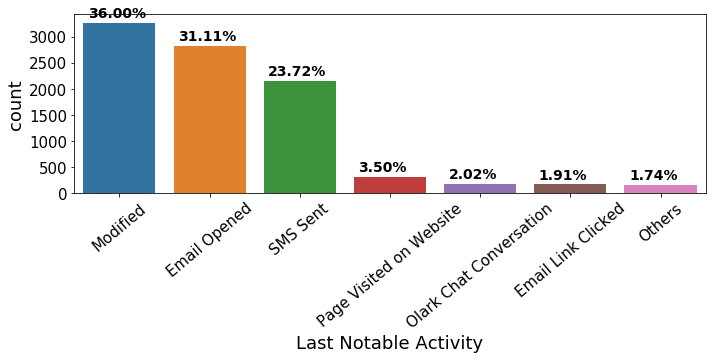

In [53]:
# Univariate analysis for Last Notable Activiy 
univariatePlot(leads,col='Last Notable Activity',width=10,height=5,rotation=40)

#### Observation: 

Last Notable Activity is more under Modified, Email Opened and SMS Sent cases

### Let's conduct univariate analysis for the below Numerical variables

Total Visits <br>
Page Views Per Visit <br>

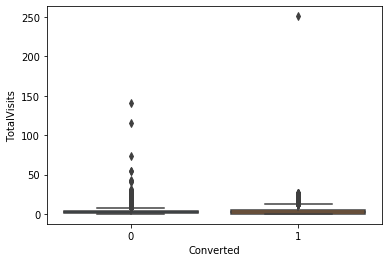

In [54]:
# Univariate analysis for Total Visits
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.show()

We see that the data is not evenly distributed, it has lot of outliers

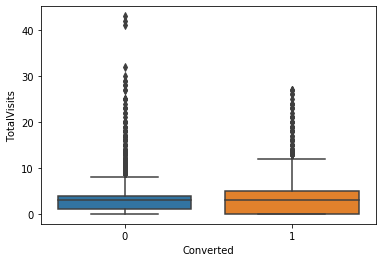

In [55]:
# we can clearly see there are outliers
# Lets check for Total Visits 0 to 50
df_temp=leads.loc[leads['TotalVisits']<=50]
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df_temp )
plt.show()

#### Observation: 

Median for Converted & Not Converted is same and indicates that Total visits may not impact the conversion. Lets check this using the model

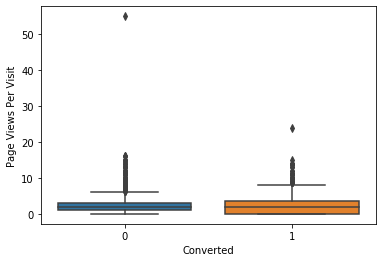

In [56]:
# Univariate analysis for Page Views Per Visit
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads)
plt.show()

#### Observation: 

Median for Converted & Not Converted is same and indicates that Page Views Per Visit may not impact the conversion. Lets check this using the model

Since we are dealing with a small data set and we do not want to lose important data points, removing outliers is not an option.

We can look at handling outliers by capping, we will come to it if need be from model.

For now, let us proceed further

### Bivariate Analysis

In [57]:
# function to plot bar chart for 2 variables
def bivariatePlot(col,width=20,height=10,rotation=90):
    data_col=leads.groupby([col,'Converted']).Converted.count().unstack()
    data_col_per=round(100*data_col.div(data_col.sum(axis=1),axis=0),2)
    ax=data_col_per.plot(kind="bar", stacked=True,color=('lightcoral','seagreen'),figsize=(width,height))
    ax.legend(loc='upper right',shadow='True',fontsize=12) 
    plt.xticks(rotation=rotation,fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel(col,fontsize=16)
    plt.ylabel('percent',fontsize=16)
    for p in ax.patches:
        width,height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.annotate('{:1.2f}%'.format(height), (p.get_x()+.1*width, p.get_y()+.2*height),fontsize=12)    
plt.show()

### Let's conduct bivariate analysis for the below variables

Lead Origin <br>
Lead Source <br>
Specialization <br>
Last Notable Activity <br>


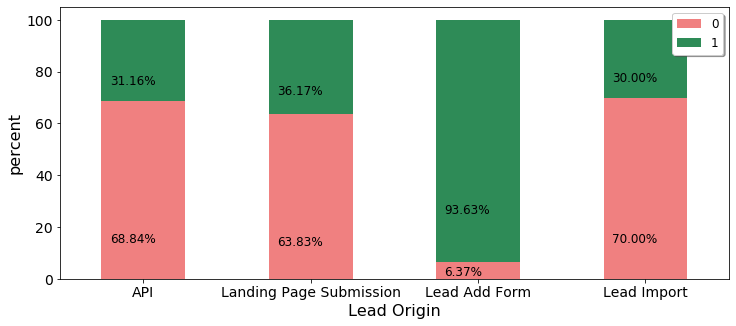

In [58]:
# Bivariate analysis for Lead Origin
bivariatePlot(col='Lead Origin',width=12,height=5,rotation=0)

#### Observation: 

We can see that conversion is good for Lead Add Form, Landing Page Submissions, API and Lead Import <br>

For leads that are not converted, Lead Import, API and Landing Page Submissions are more

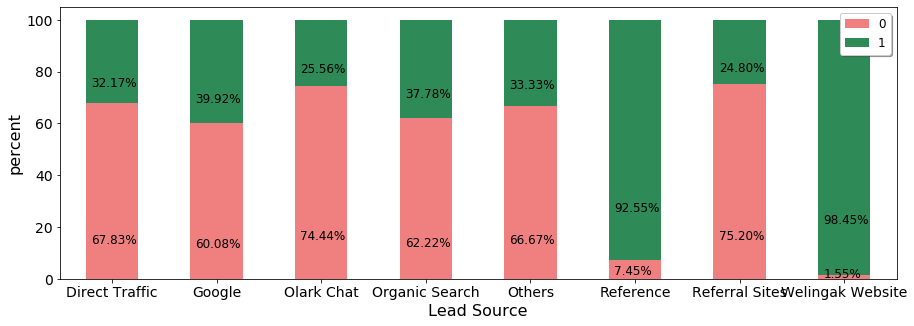

In [59]:
# Bivariate analysis for Lead Source
bivariatePlot(col='Lead Source',width=15,height=5,rotation=0)

#### Observation: 

We can see that conversion is very good for Wellingak Website and Reference <br>

For leads that are not converted, Referral Sites, Olark Chat, Direct Traffic aaplications are high

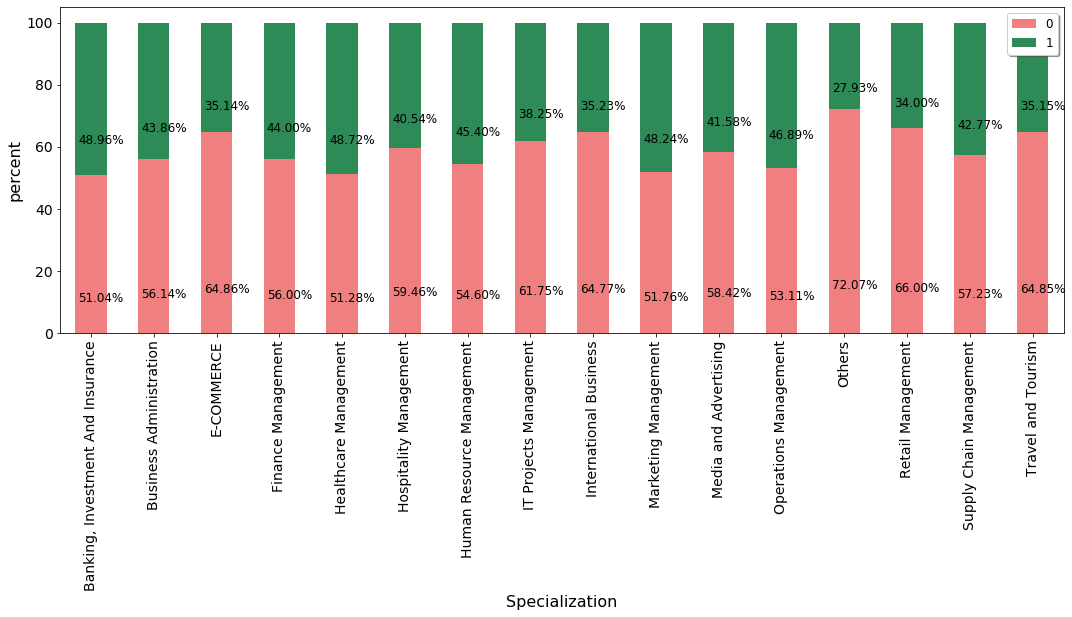

In [60]:
# Bivariate analysis for Specialization
bivariatePlot(col='Specialization',width=18,height=6,rotation=90)

#### Observation: 

We notice that Maximum Conversion is from Banking, Investment & Insurance, Healthcare Management, Marketing Management

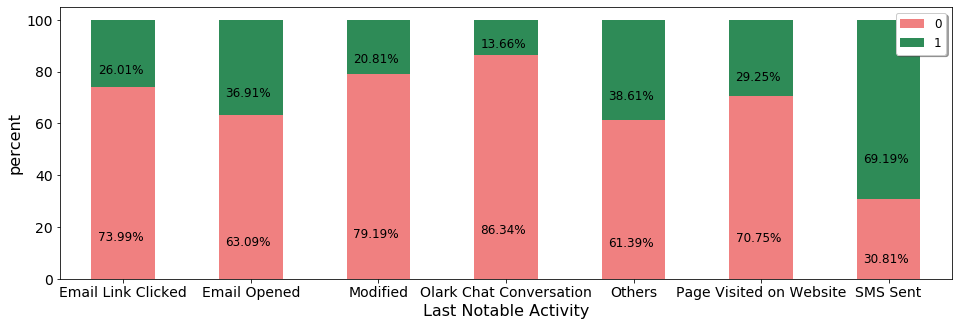

In [61]:
# Bivariate analysis for Last Notable Activity
bivariatePlot(col='Last Notable Activity',width=16,height=5,rotation=0)

#### Observation: 

Applicants who interacted through SMS have highest conversions

Now that we have basic idea of the features, lets prepare the data for building model

### Numerical Variables Analysis

Let us now look at numerical variables and analyze the data

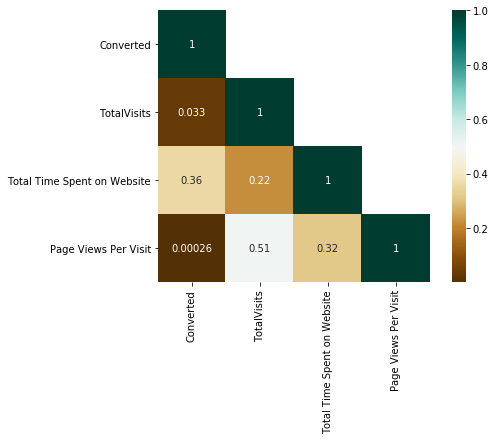

In [62]:
#Checking correlations between numeric variables

cor_mat= leads.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(8,5)
sns.heatmap(cor_mat,mask=mask,square=True,annot=True,cbar=True,cmap="BrBG")
plt.show()

#### Observation:

Overall all numerical variables seem ok, there is not any very strong correlation between any of the variables

We can proceed further with preparing data for the model

## Step 4: Data Preparation

### Creating Dummy Variables

Let us now go ahead with creating dummy variables for all the categorical variables

In [63]:
# Let us check the  'object' type columns

catcol = leads.loc[:, leads.dtypes == 'object']
catcol.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [64]:
# Creating Dummy, delete the first dummy and dropping the original by using 'get_dummies

dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
        'A free copy of Mastering The Interview','Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe
leads = pd.concat([leads, dummy], axis=1)

In [65]:
# Creating dummy variable separately for the variable 'Specialization' since it has the level 'Others' which is useless so we
# drop that level by specifying it explicitly

dummy_spl = pd.get_dummies(leads['Specialization'], prefix = 'Specialization')
dummy_spl = dummy_spl.drop(['Specialization_Others'], 1)
leads = pd.concat([leads, dummy_spl], axis = 1)

In [66]:
# Drop the variables for which the dummy variables have been created
leads = leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'A free copy of Mastering The Interview',
       'Last Notable Activity'], 1)

In [67]:
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Test-Train Split

The next step is to split the dataset into training an testing sets.

In [68]:
# Putting feature variable to X
X = leads.drop(['Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,...,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2.0,1428,1.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
# Let us put Target variable to y
y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [70]:
# Split the dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=333)

### Feature Scaling

In [71]:
# Let us review our dataset for numeric features
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,...,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism
7635,1.0,345,1.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7276,3.0,641,1.50,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8724,3.0,389,3.00,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
8314,11.0,1002,3.67,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
5033,14.0,302,3.50,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
# Selecting the numeric variables that needs to be scaled
var_to_scale=['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']

In [73]:
# Let us scale numerical variables using MinMaxSacler
scaler = MinMaxScaler()
X_train[var_to_scale] = scaler.fit_transform(X_train[var_to_scale])


In [74]:
# Let us review the data after scaling
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,...,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism
7635,0.003984,0.153129,0.041667,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7276,0.011952,0.284510,0.062500,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8724,0.011952,0.172659,0.125000,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
8314,0.043825,0.444740,0.152917,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
5033,0.055777,0.134043,0.145833,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


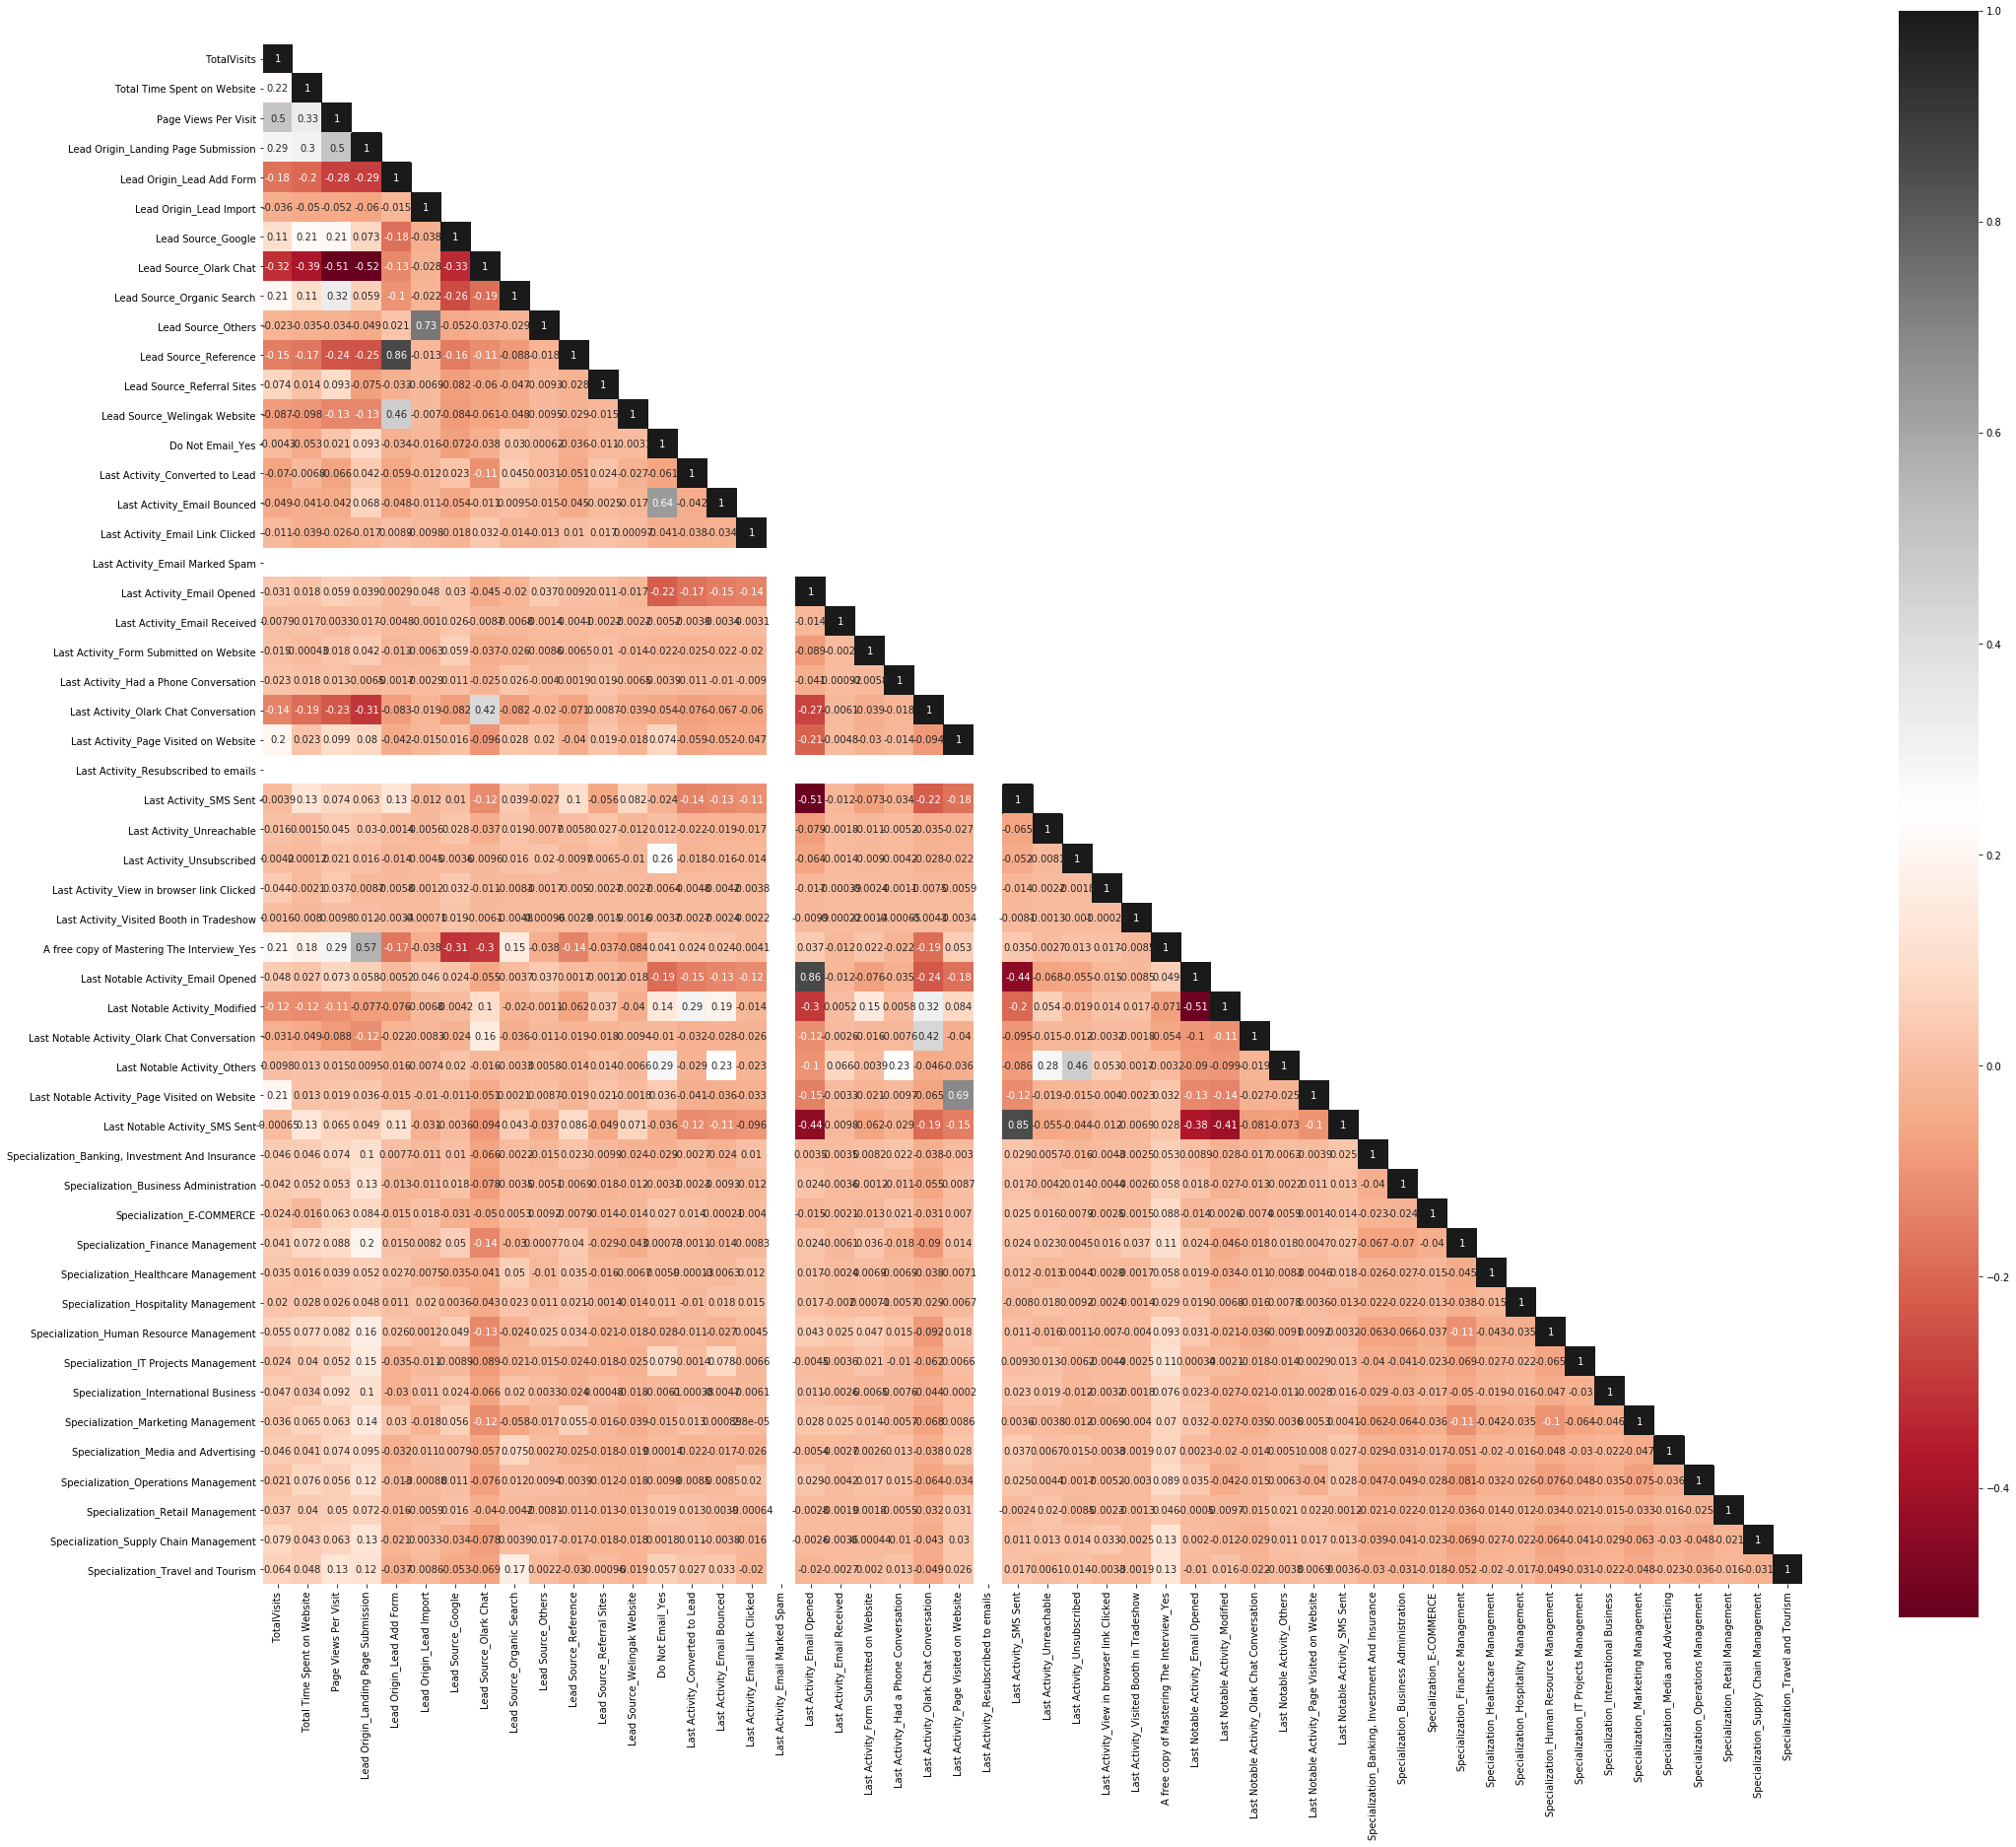

In [75]:
cor_mat= X_train.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(35,30)
sns.heatmap(cor_mat,mask=mask,square=True,annot=True,cbar=True,cmap="RdGy")
plt.show()

Because of the number of variables, we cannot really see much from the heat map

Let us directly check the correlation matrix

In [76]:
# Looking at the correlation table
leads.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism
Converted,1.000000,0.032855,0.359261,0.000260,-0.037481,0.300775,-0.009328,0.029022,-0.124085,-0.000581,...,0.006161,0.049586,0.001674,-0.007621,0.067607,0.011600,0.044953,-0.008391,0.020193,-0.008421
TotalVisits,0.032855,1.000000,0.219723,0.511068,0.290347,-0.169742,-0.037808,0.107321,-0.312573,0.193606,...,0.017825,0.062969,0.030332,0.034990,0.023355,0.043954,0.020840,0.037240,0.062917,0.064095
Total Time Spent on Website,0.359261,0.219723,1.000000,0.318350,0.292571,-0.188526,-0.050742,0.215448,-0.378626,0.100986,...,0.036847,0.067162,0.034764,0.023108,0.068158,0.043215,0.062165,0.028783,0.050945,0.043377
Page Views Per Visit,0.000260,0.511068,0.318350,1.000000,0.484119,-0.268415,-0.056068,0.205777,-0.503658,0.304414,...,0.033070,0.082218,0.074513,0.069476,0.056391,0.065992,0.049289,0.045710,0.064994,0.113364
Lead Origin_Landing Page Submission,-0.037481,0.290347,0.292571,0.484119,1.000000,-0.282445,-0.062195,0.079515,-0.528424,0.050919,...,0.056798,0.156915,0.146027,0.096576,0.132351,0.100771,0.125445,0.076578,0.126661,0.111260
Lead Origin_Lead Add Form,0.300775,-0.169742,-0.188526,-0.268415,-0.282445,1.000000,-0.015064,-0.177063,-0.125706,-0.099838,...,0.003656,0.033304,-0.028452,-0.026992,0.031828,-0.033363,-0.011751,-0.018986,-0.023868,-0.036415
Lead Origin_Lead Import,-0.009328,-0.037808,-0.050742,-0.056068,-0.062195,-0.015064,1.000000,-0.039203,-0.028183,-0.021985,...,0.011056,0.001544,-0.011808,0.005820,-0.018190,0.004322,-0.005472,-0.006080,-0.001443,-0.008691
Lead Source_Google,0.029022,0.107321,0.215448,0.205777,0.079515,-0.177063,-0.039203,1.000000,-0.333076,-0.259823,...,-0.002467,0.047479,0.001346,0.010780,0.058098,0.001675,0.007282,0.014384,-0.025423,-0.052925
Lead Source_Olark Chat,-0.124085,-0.312573,-0.378626,-0.503658,-0.528424,-0.125706,-0.028183,-0.333076,1.000000,-0.186787,...,-0.046837,-0.123187,-0.093226,-0.058700,-0.108860,-0.058700,-0.078859,-0.043634,-0.074108,-0.064376
Lead Source_Organic Search,-0.000581,0.193606,0.100986,0.304414,0.050919,-0.099838,-0.021985,-0.259823,-0.186787,1.000000,...,0.032750,-0.021087,-0.022775,0.018269,-0.052599,0.070200,0.006586,0.013568,0.003449,0.150914


#### Observation:

Few of the variables seem pretty corrlelated but we will leave them for now since they will be handled automatically during RFE

Let us proceed further with building our model now

## Step 5: Model Building

Let us start building the model , first we use RFE to eliminate majority of features not required or do not impact

In [77]:
# Let's start with RFE for automatic selection
logreg = LogisticRegression()
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [78]:
# Let's check the features selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 17),
 ('Lead Origin_Landing Page Submission', False, 7),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 16),
 ('Lead Source_Google', False, 24),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 25),
 ('Lead Source_Others', False, 23),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 26),
 ('Lead Source_Welingak Website', True, 1),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 36),
 ('Last Activity_Email Marked Spam', False, 38),
 ('Last Activity_Email Opened', False, 21),
 ('Last Activity_Email Received', False, 18),
 ('Last Activity_Form Submitted on Website', False, 22),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('L

In [79]:
# create variable 'col' with all the columns selected by RFE
col = X_train.columns[rfe.support_]

In [80]:
# Selecting the columns selected by RFE
X_train = X_train[col]

In [81]:
# Buidling our first logistic regression model
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2810.4
Date:                Mon, 07 Sep 2020   Deviance:                       5620.9
Time:                        20:49:50   Pearson chi2:                 6.34e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -2.3677      0.087    -27.246      0.000      -2.538      -2.197
TotalVisits                                          8.5652      2.688      3.186      0.001       3.296      13.834
Total Time Spent on Website                          4.6570      0.161     28.882      0.000       4.341       4.973
Lead Origin_Lead Add Form                            2.4288      0.912      2.662      0.008       0.641       4.217
Lead Source_Olark Chat                               1.3255      0.110     12.102      0.000       1.111       1.540
Lead Source_Reference                                2.1090      0.938      2.249      0.025       0.271       3.947
Lead Source_Welingak Website                         4.1671      1.360      3.063      0.002       1.501       6.833
Do Not Email_Yes                                    -1.5216      0.196     -7.773      0.000      -1.905      -1.138
Last Activity_Converted to Lead                     -1.2344      0.215     -5.730      0.000      -1.657      -0.812
Last Activity_Email Bounced                         -1.0306      0.364     -2.832      0.005      -1.744      -0.317
Last Activity_Had a Phone Conversation               1.2107      0.707      1.712      0.087      -0.175       2.597
Last Activity_Olark Chat Conversation               -1.6212      0.160    -10.132      0.000      -1.935      -1.308
Last Notable Activity_Others                         1.6174      0.290      5.571      0.000       1.048       2.186
Last Notable Activity_SMS Sent                       1.4723      0.078     18.862      0.000       1.319       1.625
Specialization_Banking, Investment And Insurance     0.4404      0.170      2.589      0.010       0.107       0.774
Specialization_Healthcare Management                 0.4157      0.240      1.731      0.083      -0.055       0.886
====================================================================================================================
"""

We can see p-values of few of the variable seems to be insignificant (ie more than 0.05) 

- Last Activity_Had a Phone Conversation
- Specialization_Healthcare Management 
- Lead Origin_Lead Add Form

seem to be insignificant in presence of other variables.

Let us calcualte **VIF** also and see

In [82]:
# calculation of VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,60.88
4,Lead Source_Reference,47.07
5,Lead Source_Welingak Website,14.88
6,Do Not Email_Yes,1.88
8,Last Activity_Email Bounced,1.78
1,Total Time Spent on Website,1.61
0,TotalVisits,1.43
3,Lead Source_Olark Chat,1.40
10,Last Activity_Olark Chat Conversation,1.38
12,Last Notable Activity_SMS Sent,1.35


We see that VIF is ok for most of the features except for the below
 - Lead Origin_Lead Add Form
 - Lead Source_Reference
 - Lead Source_Welingak Website

Let us check by first dropping the variable "Lead Origin_Lead Add Form" as this has high VIF

In [83]:
# Drop the column "Lead Origin_Lead Add Form"
col = col.drop('Lead Origin_Lead Add Form', 1)

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2814.3
Date:                Mon, 07 Sep 2020   Deviance:                       5628.7
Time:                        20:49:50   Pearson chi2:                 6.34e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -2.3549      0.087    -27.194      0.000      -2.525      -2.185
TotalVisits                                          8.3757      2.680      3.125      0.002       3.123      13.629
Total Time Spent on Website                          4.6445      0.161     28.843      0.000       4.329       4.960
Lead Source_Olark Chat                               1.3179      0.109     12.055      0.000       1.104       1.532
Lead Source_Reference                                4.5263      0.239     18.927      0.000       4.058       4.995
Lead Source_Welingak Website                         6.5847      1.014      6.495      0.000       4.598       8.572
Do Not Email_Yes                                    -1.5236      0.196     -7.788      0.000      -1.907      -1.140
Last Activity_Converted to Lead                     -1.2407      0.215     -5.762      0.000      -1.663      -0.819
Last Activity_Email Bounced                         -1.0323      0.364     -2.839      0.005      -1.745      -0.320
Last Activity_Had a Phone Conversation               1.2079      0.707      1.709      0.087      -0.177       2.593
Last Activity_Olark Chat Conversation               -1.6253      0.160    -10.164      0.000      -1.939      -1.312
Last Notable Activity_Others                         1.6142      0.290      5.563      0.000       1.045       2.183
Last Notable Activity_SMS Sent                       1.4690      0.078     18.834      0.000       1.316       1.622
Specialization_Banking, Investment And Insurance     0.4368      0.170      2.570      0.010       0.104       0.770
Specialization_Healthcare Management                 0.4122      0.240      1.718      0.086      -0.058       0.883
====================================================================================================================
"""

In [84]:
# calculation of VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Do Not Email_Yes,1.88
7,Last Activity_Email Bounced,1.78
1,Total Time Spent on Website,1.61
0,TotalVisits,1.43
2,Lead Source_Olark Chat,1.40
9,Last Activity_Olark Chat Conversation,1.38
11,Last Notable Activity_SMS Sent,1.35
10,Last Notable Activity_Others,1.19
8,Last Activity_Had a Phone Conversation,1.07
3,Lead Source_Reference,1.05


Let us drop the feature "Last Activity_Had a Phone Conversation" as this has high p-value

In [85]:
# Let's drop the feature "Last Activity_Had a Phone Conversation"
col = col.drop('Last Activity_Had a Phone Conversation', 1)

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2816.0
Date:                Mon, 07 Sep 2020   Deviance:                       5631.9
Time:                        20:49:51   Pearson chi2:                 6.35e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -2.3533      0.087    -27.180      0.000      -2.523      -2.184
TotalVisits                                          8.5094      2.677      3.179      0.001       3.262      13.756
Total Time Spent on Website                          4.6425      0.161     28.842      0.000       4.327       4.958
Lead Source_Olark Chat                               1.3161      0.109     12.039      0.000       1.102       1.530
Lead Source_Reference                                4.5297      0.239     18.939      0.000       4.061       4.999
Lead Source_Welingak Website                         6.5849      1.014      6.495      0.000       4.598       8.572
Do Not Email_Yes                                    -1.5493      0.196     -7.914      0.000      -1.933      -1.166
Last Activity_Converted to Lead                     -1.2430      0.215     -5.774      0.000      -1.665      -0.821
Last Activity_Email Bounced                         -1.0695      0.365     -2.929      0.003      -1.785      -0.354
Last Activity_Olark Chat Conversation               -1.6265      0.160    -10.170      0.000      -1.940      -1.313
Last Notable Activity_Others                         1.7389      0.278      6.266      0.000       1.195       2.283
Last Notable Activity_SMS Sent                       1.4673      0.078     18.812      0.000       1.314       1.620
Specialization_Banking, Investment And Insurance     0.4455      0.170      2.627      0.009       0.113       0.778
Specialization_Healthcare Management                 0.4098      0.240      1.707      0.088      -0.061       0.880
====================================================================================================================
"""

In [86]:
# calculation of VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Do Not Email_Yes,1.88
7,Last Activity_Email Bounced,1.78
1,Total Time Spent on Website,1.61
0,TotalVisits,1.43
2,Lead Source_Olark Chat,1.40
8,Last Activity_Olark Chat Conversation,1.38
10,Last Notable Activity_SMS Sent,1.35
9,Last Notable Activity_Others,1.12
3,Lead Source_Reference,1.05
11,"Specialization_Banking, Investment And Insurance",1.04


Let us drop the feature "Specialization_Healthcare Management" as this has high p-value

In [87]:
# Let's drop the feature "Specialization_Healthcare Management"
col = col.drop('Specialization_Healthcare Management', 1)

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2817.4
Date:                Mon, 07 Sep 2020   Deviance:                       5634.8
Time:                        20:49:51   Pearson chi2:                 6.37e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -2.3466      0.086    -27.155      0.000      -2.516      -2.177
TotalVisits                                          8.6794      2.672      3.248      0.001       3.441      13.917
Total Time Spent on Website                          4.6384      0.161     28.836      0.000       4.323       4.954
Lead Source_Olark Chat                               1.3131      0.109     12.019      0.000       1.099       1.527
Lead Source_Reference                                4.5411      0.239     18.964      0.000       4.072       5.010
Lead Source_Welingak Website                         6.5818      1.014      6.492      0.000       4.595       8.569
Do Not Email_Yes                                    -1.5392      0.195     -7.874      0.000      -1.922      -1.156
Last Activity_Converted to Lead                     -1.2388      0.215     -5.754      0.000      -1.661      -0.817
Last Activity_Email Bounced                         -1.0780      0.365     -2.953      0.003      -1.793      -0.363
Last Activity_Olark Chat Conversation               -1.6288      0.160    -10.195      0.000      -1.942      -1.316
Last Notable Activity_Others                         1.7334      0.277      6.249      0.000       1.190       2.277
Last Notable Activity_SMS Sent                       1.4680      0.078     18.825      0.000       1.315       1.621
Specialization_Banking, Investment And Insurance     0.4363      0.169      2.574      0.010       0.104       0.768
====================================================================================================================
"""

In [88]:
# calculation of VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Do Not Email_Yes,1.87
7,Last Activity_Email Bounced,1.78
1,Total Time Spent on Website,1.61
0,TotalVisits,1.42
2,Lead Source_Olark Chat,1.40
8,Last Activity_Olark Chat Conversation,1.38
10,Last Notable Activity_SMS Sent,1.35
9,Last Notable Activity_Others,1.12
3,Lead Source_Reference,1.04
11,"Specialization_Banking, Investment And Insurance",1.04


Let us drop the feature 'Specialization_Banking, Investment And Insurance' as this has relatively high p-value compared to other variables

In [89]:
# Let's drop the feature 'Specialization_Banking, Investment And Insurance'
col = col.drop('Specialization_Banking, Investment And Insurance', 1)

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2820.7
Date:                Mon, 07 Sep 2020   Deviance:                       5641.4
Time:                        20:49:51   Pearson chi2:                 6.38e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.3321      0.086    -27.067      0.000      -2.501      -2.163
TotalVisits                               8.9647      2.671      3.356      0.001       3.729      14.200
Total Time Spent on Website               4.6379      0.161     28.854      0.000       4.323       4.953
Lead Source_Olark Chat                    1.3041      0.109     11.953      0.000       1.090       1.518
Lead Source_Reference                     4.5492      0.239     19.002      0.000       4.080       5.018
Lead Source_Welingak Website              6.5684      1.014      6.479      0.000       4.581       8.555
Do Not Email_Yes                         -1.5503      0.195     -7.936      0.000      -1.933      -1.167
Last Activity_Converted to Lead          -1.2353      0.215     -5.744      0.000      -1.657      -0.814
Last Activity_Email Bounced              -1.0877      0.365     -2.976      0.003      -1.804      -0.371
Last Activity_Olark Chat Conversation    -1.6279      0.160    -10.191      0.000      -1.941      -1.315
Last Notable Activity_Others              1.7493      0.278      6.299      0.000       1.205       2.294
Last Notable Activity_SMS Sent            1.4701      0.078     18.866      0.000       1.317       1.623
=========================================================================================================
"""

In [90]:
# calculating VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Do Not Email_Yes,1.87
7,Last Activity_Email Bounced,1.78
1,Total Time Spent on Website,1.60
0,TotalVisits,1.41
2,Lead Source_Olark Chat,1.40
8,Last Activity_Olark Chat Conversation,1.38
10,Last Notable Activity_SMS Sent,1.35
9,Last Notable Activity_Others,1.12
3,Lead Source_Reference,1.04
4,Lead Source_Welingak Website,1.02


We can see that all the p values and VIF values are good

Let us use this as our final model and start evaluating the model

## Step 6: Model Evaluation

As the p-values and VIFs are good for all the variables, let's make predictions and proceed for evaluation

In [91]:
# starting prediction
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.01442489, 0.28793764, 0.5114902 , 0.8667727 , 0.56457552,
       0.29475915, 0.14200618, 0.1975462 , 0.05066722, 0.03140907])

In [92]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.014425,0
1,0,0.287938,0
2,0,0.511490,1
3,1,0.866773,1
4,0,0.564576,1


In [93]:
# function to draw confusion matrix
def draw_cm(actual, predicted , colour):
    cm = metrics.confusion_matrix( actual, predicted, [0,1] ) 
    sns.heatmap(cm, annot=True, fmt='.2f', cmap=colour,
    xticklabels = ["Not Converted", "Converted"] ,
    yticklabels = ["Not Converted", "Converted"] ) 
    plt.ylabel('True label')
    plt.xlabel('Predicted label') 
    plt.show()

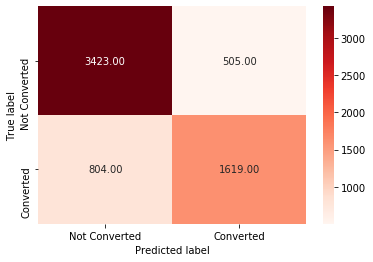

In [94]:
# Let us create confusion matrix

draw_cm( y_train_pred_final.Converted, y_train_pred_final.Predicted,"Reds")

In [95]:
# Let's check the confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3423,  505],
       [ 804, 1619]], dtype=int64)

In [96]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7938907258699417


Accuray of 79.4% on Train data is good to start with

Let us now check other metrics

In [97]:
# Let us review other metrics
print( metrics.classification_report( y_train_pred_final.Converted, y_train_pred_final.Predicted))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      3928
           1       0.76      0.67      0.71      2423

    accuracy                           0.79      6351
   macro avg       0.79      0.77      0.78      6351
weighted avg       0.79      0.79      0.79      6351



In [98]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [99]:
# Calculate the sensitivity

TP/(TP+FN)

0.6681799422203879

In [100]:
# Calculate the specificity

TN/(TN+FP)

0.8714358452138493

### Plotting the ROC Curve
An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [101]:
# function to plot the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [102]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

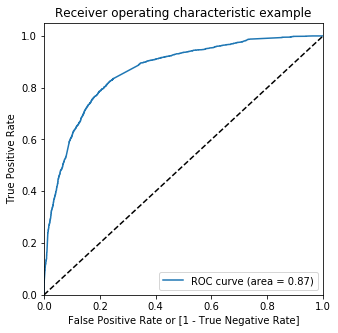

In [103]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

We notice that Area under the curve is 0.87 which is pretty good

### Finding Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [104]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.014425,0,1,0,0,0,0,0,0,0,0,0
1,0,0.287938,0,1,1,1,0,0,0,0,0,0,0
2,0,0.511490,1,1,1,1,1,1,1,0,0,0,0
3,1,0.866773,1,1,1,1,1,1,1,1,1,1,0
4,0,0.564576,1,1,1,1,1,1,1,0,0,0,0


In [105]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381515  1.000000  0.000000
0.1   0.1  0.550150  0.979364  0.285387
0.2   0.2  0.717997  0.910854  0.599033
0.3   0.3  0.787120  0.823772  0.764511
0.4   0.4  0.799244  0.760215  0.823320
0.5   0.5  0.793891  0.668180  0.871436
0.6   0.6  0.788852  0.595130  0.908350
0.7   0.7  0.758936  0.452745  0.947811
0.8   0.8  0.730121  0.344201  0.968177
0.9   0.9  0.699732  0.234420  0.986762


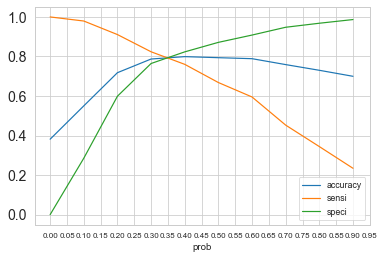

In [106]:
# Let's plot accuracy sensitivity and specificity for various probabilities
sns.set_style("whitegrid")
sns.set_context("paper")
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.yticks(size=14)
plt.show()

From the curve above, around 0.34 seems to be the optimum point to take it as a threshold

In [107]:
# update the 'final_predicted' value based on the cutoff value
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.342 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.014425,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.287938,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.511490,1,1,1,1,1,1,1,0,0,0,0,1
3,1,0.866773,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.564576,1,1,1,1,1,1,1,0,0,0,0,1


In [108]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7913714375688868

In [109]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion2

array([[3087,  841],
       [ 484, 1939]], dtype=int64)

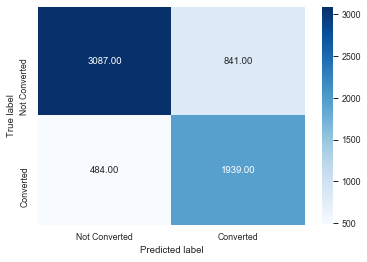

In [110]:
# draw the confusion matrix
draw_cm(y_train_pred_final.Converted, y_train_pred_final.final_predicted,"Blues")

In [111]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [112]:
# Calculate Sensitivity

TP/(TP+FN)

0.8002476269087908

In [113]:
# Calculate Specificity

TN/(TN+FP)

0.7858961303462322

### Precision and Recall

##### Precision
TP / TP + FP

In [114]:
# calculate precesion
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.762241054613936

##### Recall
TP / TP + FN

In [115]:
# calculate recall
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.6681799422203879

In [116]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

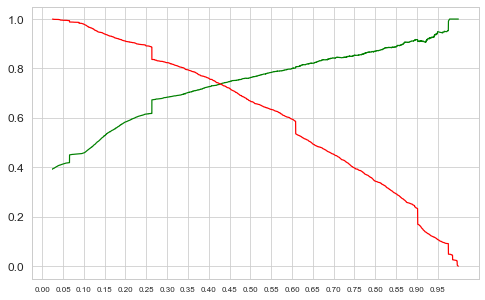

In [117]:
# Plotting the precision recall curve
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
sns.set_context("paper")
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.yticks(size=12)

plt.show()

From the curve above, 0.43 is the optimum point to take it as a threshold - for tradeoff between Precision and Recall

In [118]:
# calculation of 'final_predicted' value based on the cutoff value
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.43 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.014425,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.287938,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.511490,1,1,1,1,1,1,1,0,0,0,0,1
3,1,0.866773,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.564576,1,1,1,1,1,1,1,0,0,0,0,1


In [119]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7998740355849473

In [120]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3296,  632],
       [ 639, 1784]], dtype=int64)

In [121]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [122]:
# Calculate Precision

TP/(TP+FP)

0.7384105960264901

In [123]:
# Calculate Recall

TP/(TP+FN)

0.7362773421378457

### Making Predictions on the Test Set

In [124]:
# Scale the test set as well using just 'transform'

X_test[var_to_scale] = scaler.transform(X_test[var_to_scale])

In [125]:
# Select the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_SMS Sent
1461,0.019920,0.031514,0,0,0,0,0,0,1,0,0
7926,0.015936,0.103418,0,0,0,0,0,0,1,0,0
1909,0.019920,0.191300,0,0,0,0,0,0,0,0,0
8971,0.015936,0.788282,0,0,0,0,0,0,0,0,0
5310,0.015936,0.044829,0,0,0,0,0,0,0,0,1


In [126]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [127]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

1461    0.025700
7926    0.034308
1909    0.219894
8971    0.812562
5310    0.374918
4774    0.263477
2084    0.263477
6351    0.084663
335     0.901771
8202    0.364120
dtype: float64

In [128]:
# Converting y_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
1461,0.025700
7926,0.034308
1909,0.219894
8971,0.812562
5310,0.374918


In [129]:
# Let us convert y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [130]:
# Let us put a LeadID to index
y_test_df['LeadID'] = y_test_df.index

In [131]:
# Let us remove the index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [132]:
# Lets append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [133]:
# let us review the 'y_pred_final'

y_pred_final.head()

,Converted,LeadID,0
0,0,1461,0.025700
1,0,7926,0.034308
2,0,1909,0.219894
3,1,8971,0.812562
4,0,5310,0.374918


In [134]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Lead_Score_Prob'})

In [135]:
# Rearranging the columns

y_pred_final = y_pred_final.reindex(['LeadID','Converted','Lead_Score_Prob'], axis=1)

In [136]:
# Adding Lead_Score column
y_pred_final['Lead_Score'] = round((y_pred_final['Lead_Score_Prob'] * 100),0)


In [137]:
# Let us take care of the data type
y_pred_final['Lead_Score'] = y_pred_final['Lead_Score'].astype(int)

In [138]:
# Let's see the head of y_pred_final

y_pred_final.head()

,LeadID,Converted,Lead_Score_Prob,Lead_Score
0,1461,0,0.025700,3
1,7926,0,0.034308,3
2,1909,0,0.219894,22
3,8971,1,0.812562,81
4,5310,0,0.374918,37


In [139]:
# Make predictions on the test set using 0.341 as the cutoff
y_pred_final['Final_Predicted_Hot_Lead'] = y_pred_final.Lead_Score_Prob.map(lambda x: 1 if x > 0.341 else 0)

In [140]:
# Lets check y_pred_final

y_pred_final.head()

,LeadID,Converted,Lead_Score_Prob,Lead_Score,Final_Predicted_Hot_Lead
0,1461,0,0.025700,3,0
1,7926,0,0.034308,3,0
2,1909,0,0.219894,22,0
3,8971,1,0.812562,81,1
4,5310,0,0.374918,37,1


In [141]:
# Let's check the overall accuracy

round(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final_Predicted_Hot_Lead),4)*100

79.84

In [142]:
# create confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.Final_Predicted_Hot_Lead )
confusion2

array([[1364,  347],
       [ 202,  810]], dtype=int64)

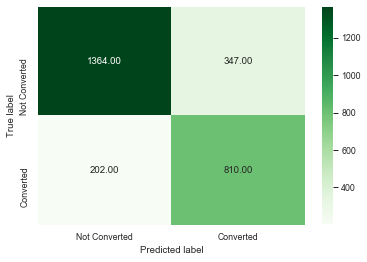

In [143]:
# draw the confusion matrix
draw_cm(y_pred_final.Converted, y_pred_final.Final_Predicted_Hot_Lead,"Greens")

In [144]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [145]:
# Calculate Sensitivity
round((TP / float(TP+FN)),4)*100

80.04

In [146]:
# Calculate Specificity
round(TN / float(TN+FP),4)*100# Calculate Precision

79.72

### Top Features/Predictors

In [147]:
# Selecting the coefficients of the selected features from our final model excluding the intercept
pd.options.display.float_format = '{:.2f}'.format
final_par = res.params[1:]
final_par

TotalVisits                              8.96
Total Time Spent on Website              4.64
Lead Source_Olark Chat                   1.30
Lead Source_Reference                    4.55
Lead Source_Welingak Website             6.57
Do Not Email_Yes                        -1.55
Last Activity_Converted to Lead         -1.24
Last Activity_Email Bounced             -1.09
Last Activity_Olark Chat Conversation   -1.63
Last Notable Activity_Others             1.75
Last Notable Activity_SMS Sent           1.47
dtype: float64

In [148]:
# Getting a relative coefficient value for all the features wrt the feature with the highest coefficient
feature_imp = final_par
feature_imp = 100.0 * (feature_imp / feature_imp.max())
feature_imp

TotalVisits                             100.00
Total Time Spent on Website              51.73
Lead Source_Olark Chat                   14.55
Lead Source_Reference                    50.74
Lead Source_Welingak Website             73.27
Do Not Email_Yes                        -17.29
Last Activity_Converted to Lead         -13.78
Last Activity_Email Bounced             -12.13
Last Activity_Olark Chat Conversation   -18.16
Last Notable Activity_Others             19.51
Last Notable Activity_SMS Sent           16.40
dtype: float64

In [149]:
# Sorting the feature variables based on their relative coefficient values
sorted_idx = np.argsort(feature_imp,kind='quicksort',order='list of str')
sorted_idx

TotalVisits                               8
Total Time Spent on Website               5
Lead Source_Olark Chat                    6
Lead Source_Reference                     7
Lead Source_Welingak Website              2
Do Not Email_Yes                         10
Last Activity_Converted to Lead           9
Last Activity_Email Bounced               3
Last Activity_Olark Chat Conversation     1
Last Notable Activity_Others              4
Last Notable Activity_SMS Sent            0
dtype: int64

<Figure size 864x576 with 0 Axes>

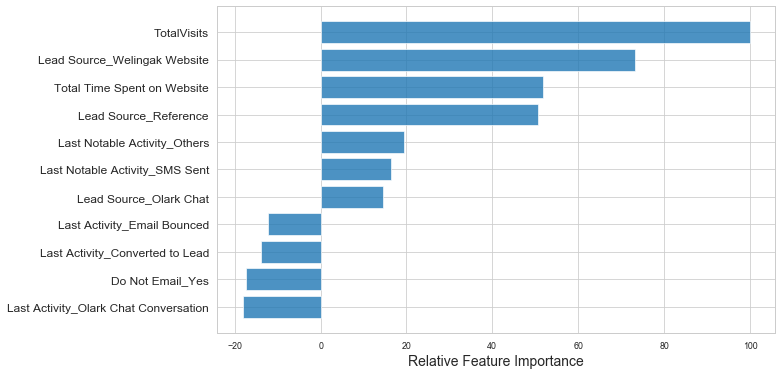

In [150]:
# Plot showing the feature variables based on their relative coefficient values
# Plotting the scree plot
fig = plt.figure(figsize = (12,8))
pos = np.arange(sorted_idx.shape[0]) + .5
featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_imp[sorted_idx], align='center',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[col].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)   
plt.show()

## Step 7: Conclusion and Reccomendations

As we can see above when cut-off = 0.341, the various Model Performance parameters on test set are as per below
- Sensitivity = 80%
- Specificity = 80%
- Accuracy = 80%

All the 3 performance parameters on test set appear to be almost same with no much variation, so we can count on this model

Top 3 variables that contribute most towards the probability of a lead getting converted as per our logistic regression model
- TotalVisits
- Lead Source_Welingak Website
- Total Time Spent on Website

So, focus should be more on these variables so that there is a better lead conversion rate